In [1]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.loader import DataLoader
from modules.utils_data import get_graphs, default_properties as props
from modules.utils_model import SingleTaskModelTrainer, MultiTaskModelTrainer
from modules.utils_plotting import plot_scatters

In [2]:
# Load graphs
test = pd.read_csv("test.csv")
test_graphs = get_graphs(test,dash_charges=True,scaled =True, test=True, save_graphs=True)
test_loader = DataLoader(test_graphs, batch_size=64, shuffle=False)

Creating new graphs
Loading DASH tree data
Loaded 122 trees and data


100%|██████████| 4646/4646 [00:31<00:00, 146.22it/s]


62 0 62


In [3]:
# Load model
model = torch.load('model_full_test.pt')
model = model.to(torch.device('cuda'))
predictions = []
targets = []
smiles = []
for data in test_loader:
    smiles.extend(data.smiles)
    targets.extend(data.y.cpu().detach().numpy())
    # Forward pass on gpu
    data = data.to(torch.device('cuda'))
    out = model(data.x, data.edge_index, data.edge_attr,data.batch)
    # Move back to cpu and fill predictions
    predictions.extend(out.cpu().detach().numpy())

In [4]:
df_preds = pd.DataFrame(predictions,columns=props).replace(-1,np.nan)
df_preds['smiles'] = smiles
df_targets = pd.DataFrame(targets,columns=props).replace(-1,np.nan)
df_targets['smiles'] = smiles

In [5]:
# MAE per property
for prop in props:
    print(f'{prop} MAE: {np.abs(df_preds[prop]-df_targets[prop]).mean()}')

LogVP MAE: 1.0581670999526978
LogP MAE: 0.4151890277862549
LogOH MAE: 1.3412964344024658
LogBCF MAE: 1.094042420387268
LogHalfLife MAE: 1.1814275979995728
BP MAE: 0.6101964116096497
Clint MAE: 1.540938138961792
FU MAE: 1.0782415866851807
LogHL MAE: 1.0954557657241821
LogKmHL MAE: 1.1430881023406982
LogKOA MAE: 1.3150876760482788
LogKOC MAE: 1.281861424446106
MP MAE: 0.7666983604431152
LogMolar MAE: 1.1038161516189575


Property: LogVP
kendall_tau: 0.3680185028748481
rmse_overall: 1.095112919807434
mae_overall: 1.0581670999526978
within_03_overall: 0.020134228187919462
within_1_overall: 0.3338926174496644
R2: -50.83981512763155
Pearson: 0.47424538987045795


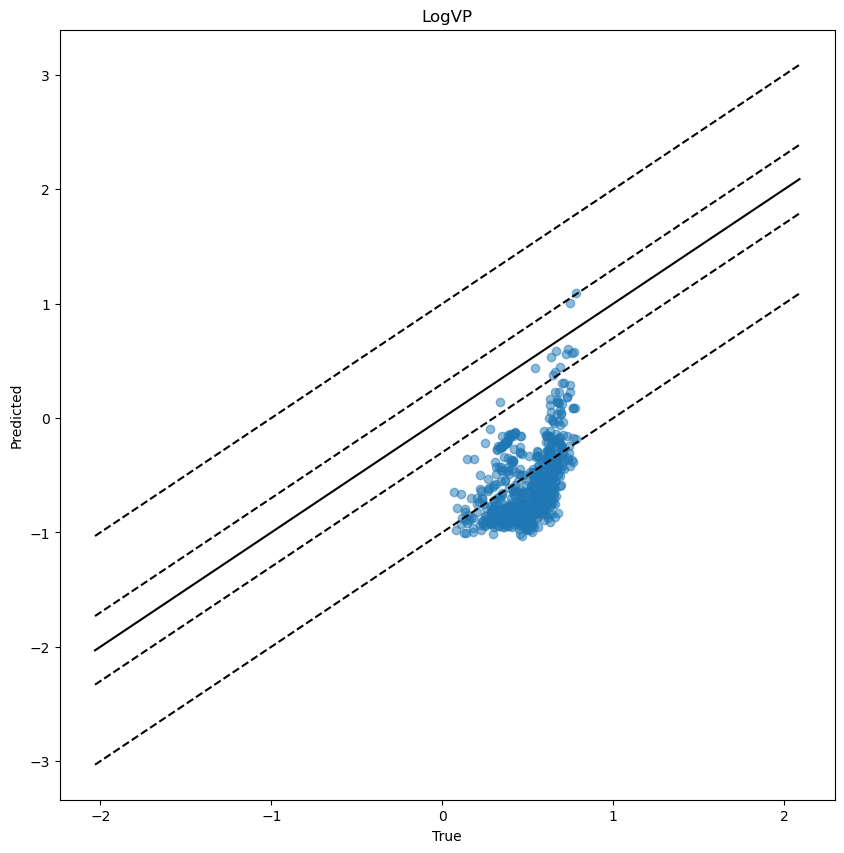

Property: LogP
kendall_tau: 0.0174190521999256
rmse_overall: 0.5235503911972046
mae_overall: 0.4151890277862549
within_03_overall: 0.46494992846924177
within_1_overall: 0.9420600858369099
R2: -21.473818571190254
Pearson: 0.029926252020333974


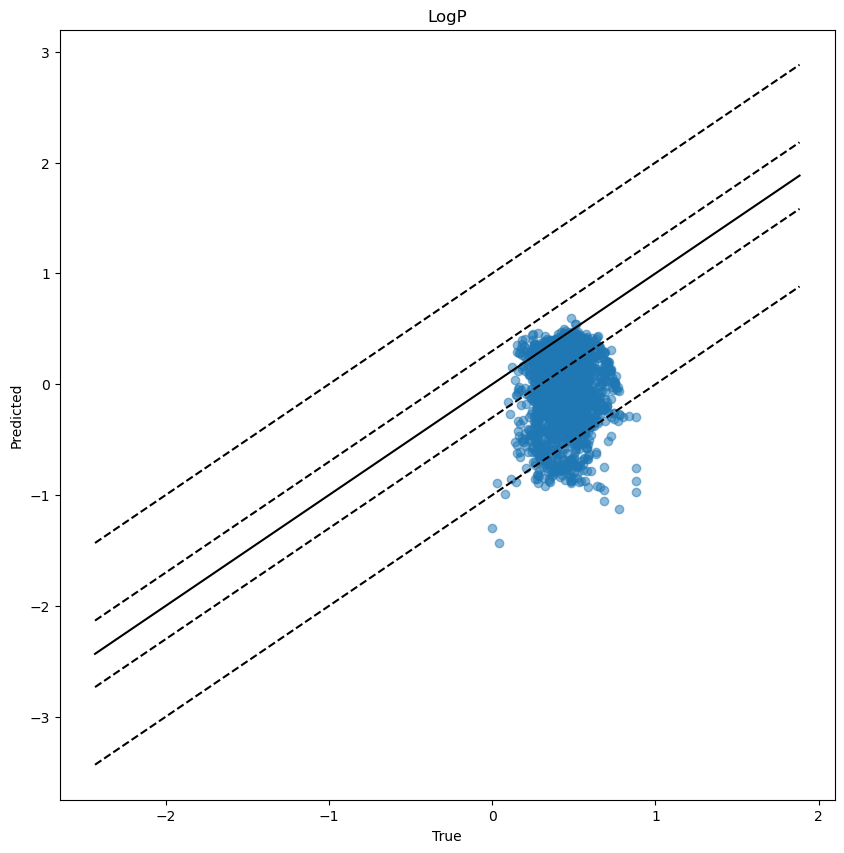

Property: LogOH
kendall_tau: -0.14652497048059504
rmse_overall: 1.4004987478256226
mae_overall: 1.3412964344024658
within_03_overall: 0.03614457831325301
within_1_overall: 0.18072289156626506
R2: -64.92123421954236
Pearson: -0.22902205682900412


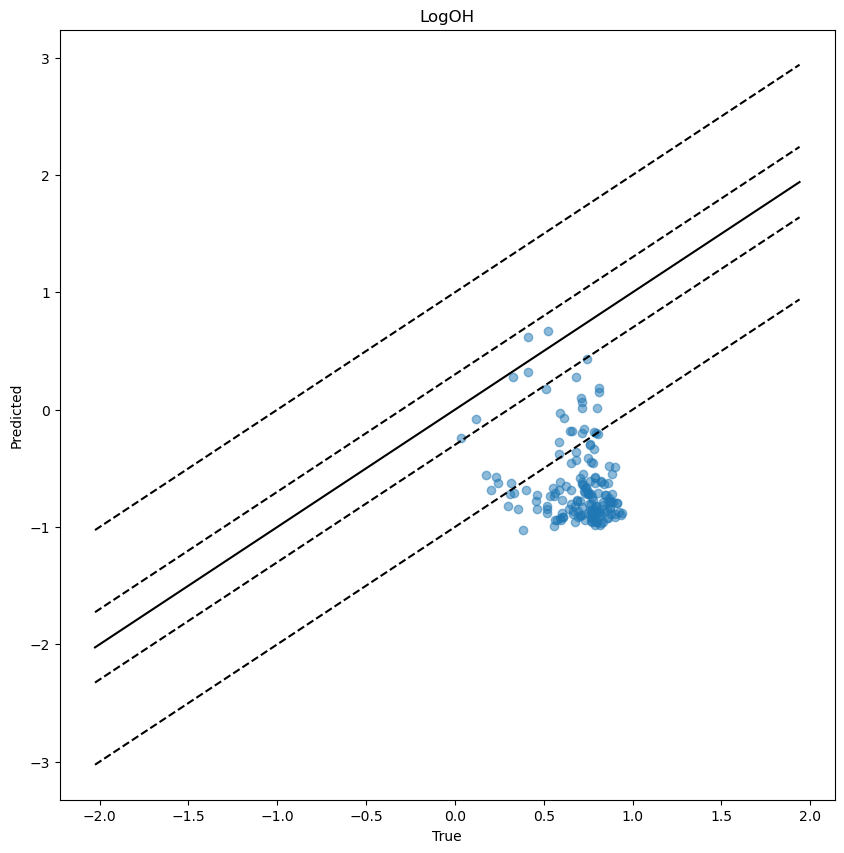

Property: LogBCF
kendall_tau: 0.07114906088248311
rmse_overall: 1.122955083847046
mae_overall: 1.0940425395965576
within_03_overall: 0.0
within_1_overall: 0.3486238532110092
R2: -39.28787090214456
Pearson: 0.24646323389524047


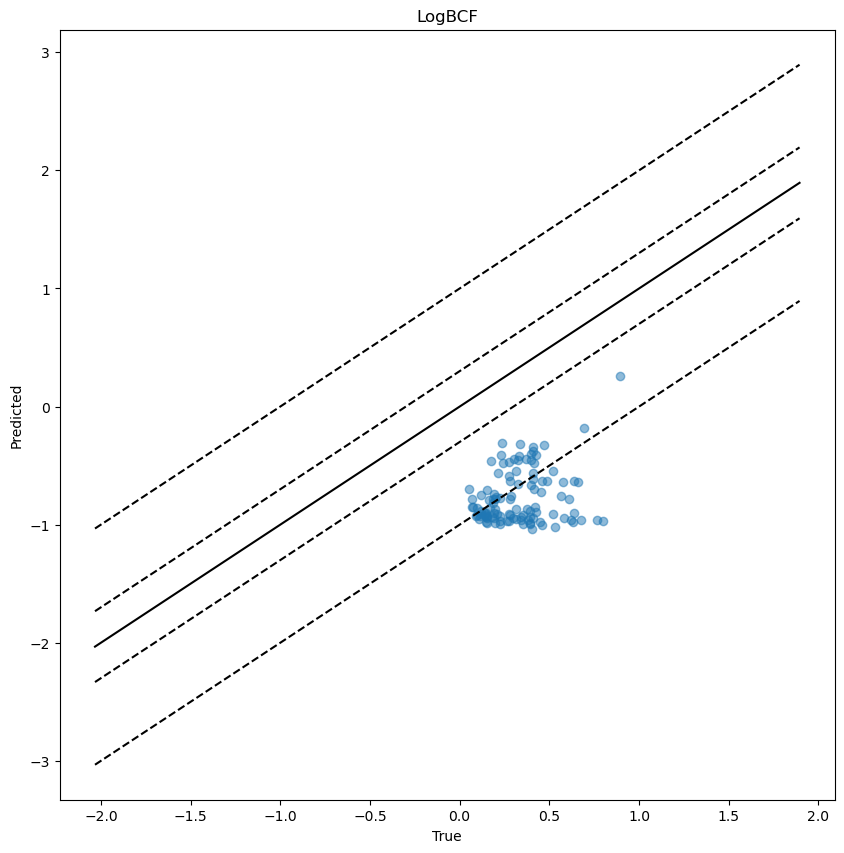

Property: LogHalfLife
kendall_tau: -0.18294404740157313
rmse_overall: 1.2231476306915283
mae_overall: 1.1814277172088623
within_03_overall: 0.0
within_1_overall: 0.3783783783783784
R2: -19.760995710988528
Pearson: -0.27916245640097087


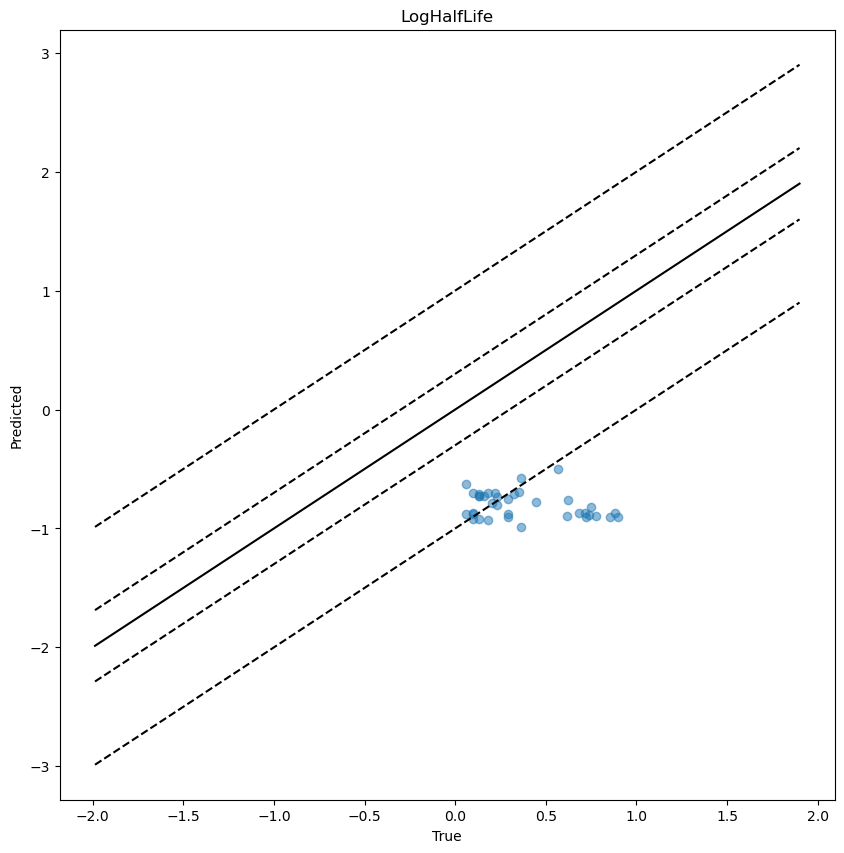

Property: BP
kendall_tau: -0.47533688842986904
rmse_overall: 0.7928674221038818
mae_overall: 0.6101964116096497
within_03_overall: 0.3888396811337467
within_1_overall: 0.7395925597874224
R2: -39.41803134262362
Pearson: -0.6545862546423086


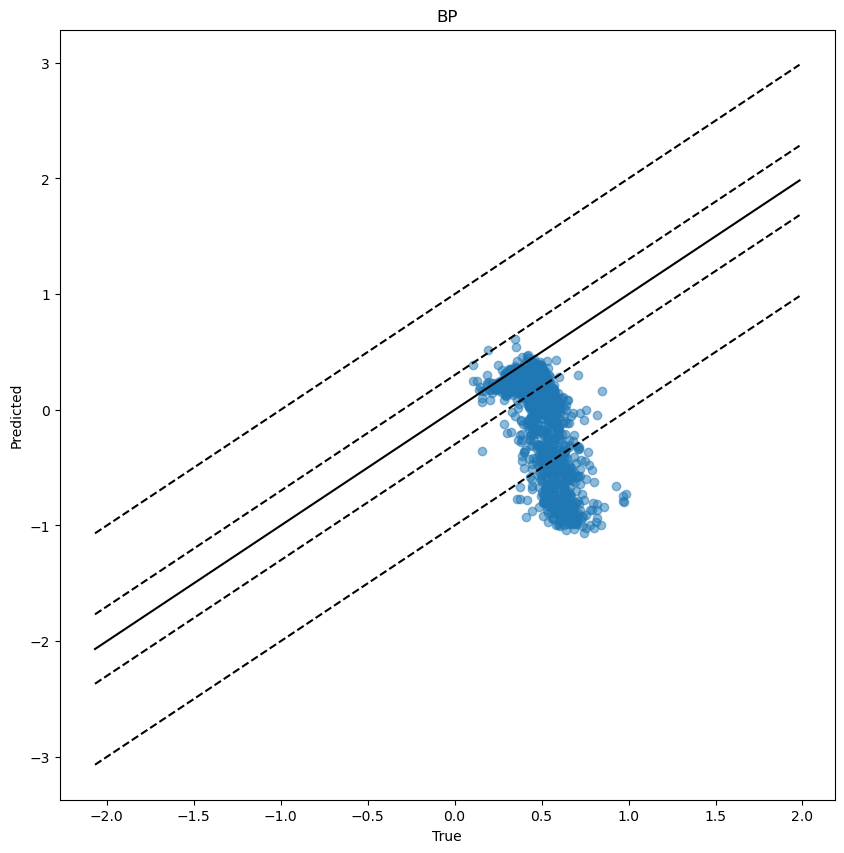

Property: Clint
kendall_tau: 0.08240962608331169
rmse_overall: 1.5720865726470947
mae_overall: 1.540938138961792
within_03_overall: 0.0
within_1_overall: 0.1717171717171717
R2: -24.180929894195252
Pearson: 0.18020397927477033


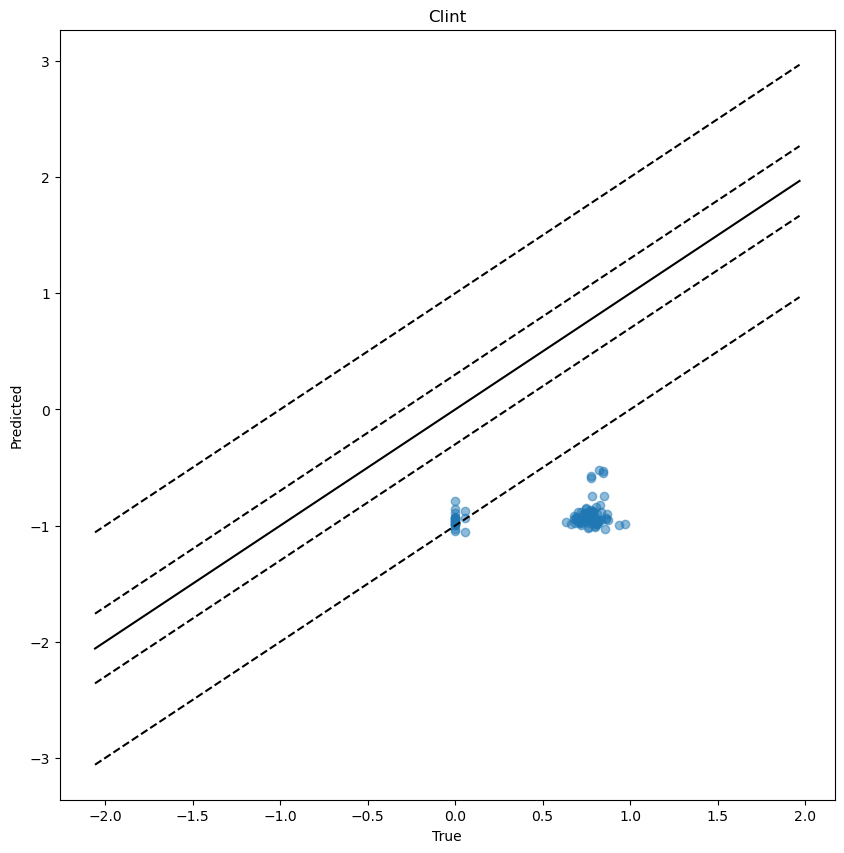

Property: FU
kendall_tau: 0.07476065182687143
rmse_overall: 1.142576813697815
mae_overall: 1.0782415866851807
within_03_overall: 0.010033444816053512
within_1_overall: 0.5217391304347826
R2: -10.655033906342846
Pearson: 0.08051926243721426


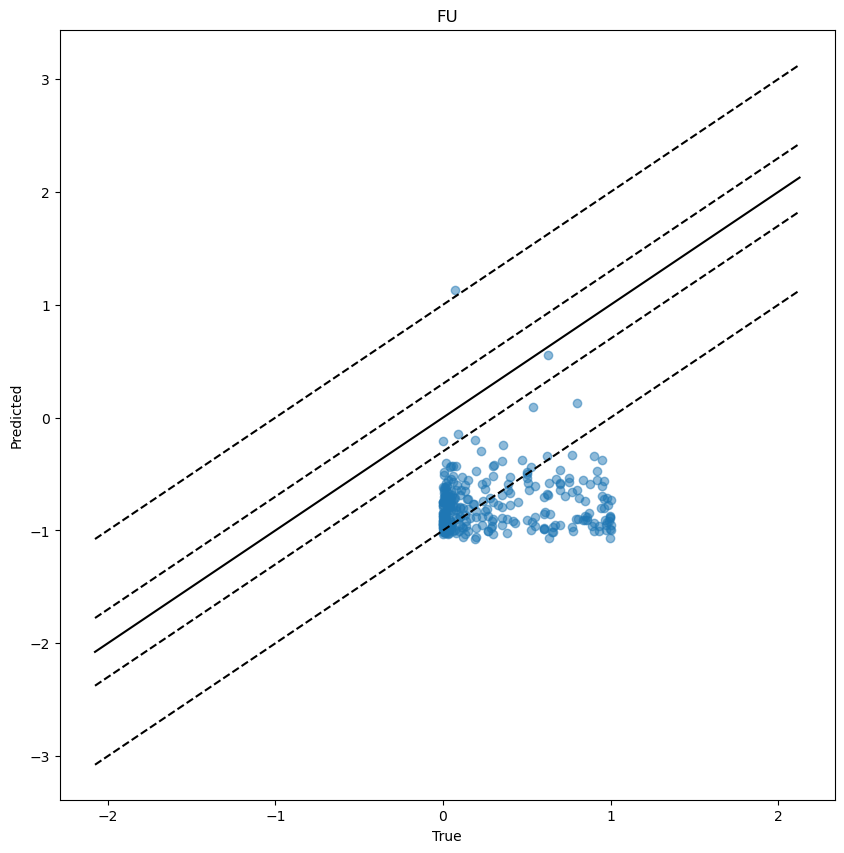

Property: LogHL
kendall_tau: 0.3079016715682623
rmse_overall: 1.1487493515014648
mae_overall: 1.0954557657241821
within_03_overall: 0.0
within_1_overall: 0.37583892617449666
R2: -83.14417178022983
Pearson: 0.4163439048290586


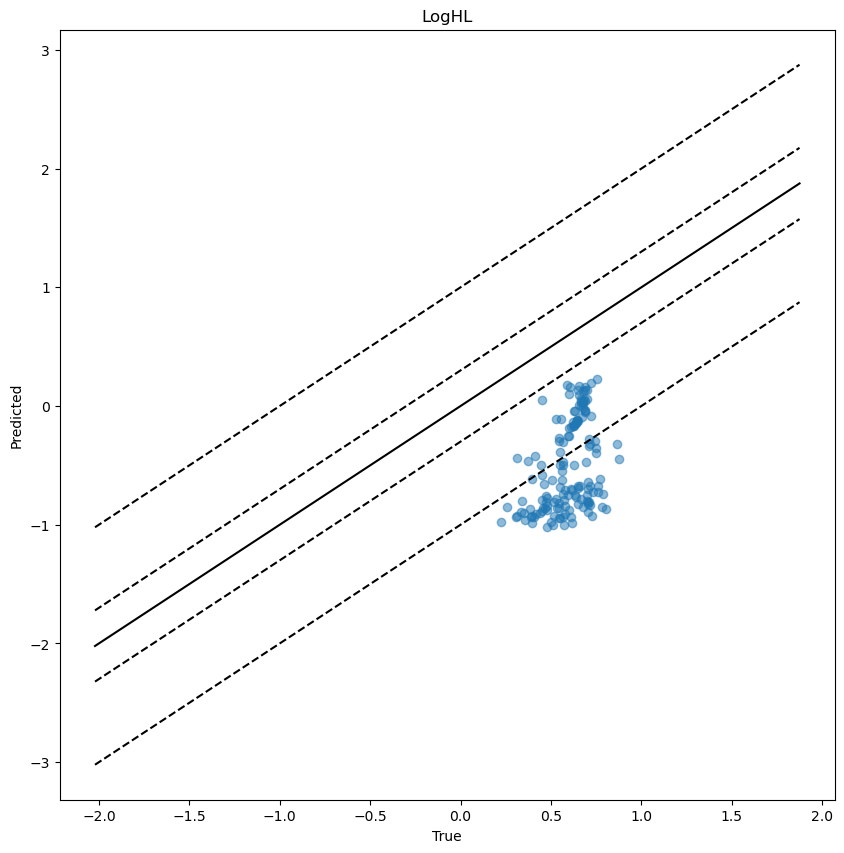

Property: LogKmHL
kendall_tau: 0.2321741521020296
rmse_overall: 1.1670242547988892
mae_overall: 1.1430879831314087
within_03_overall: 0.0
within_1_overall: 0.24509803921568626
R2: -21.666011772607128
Pearson: 0.39050954937726357


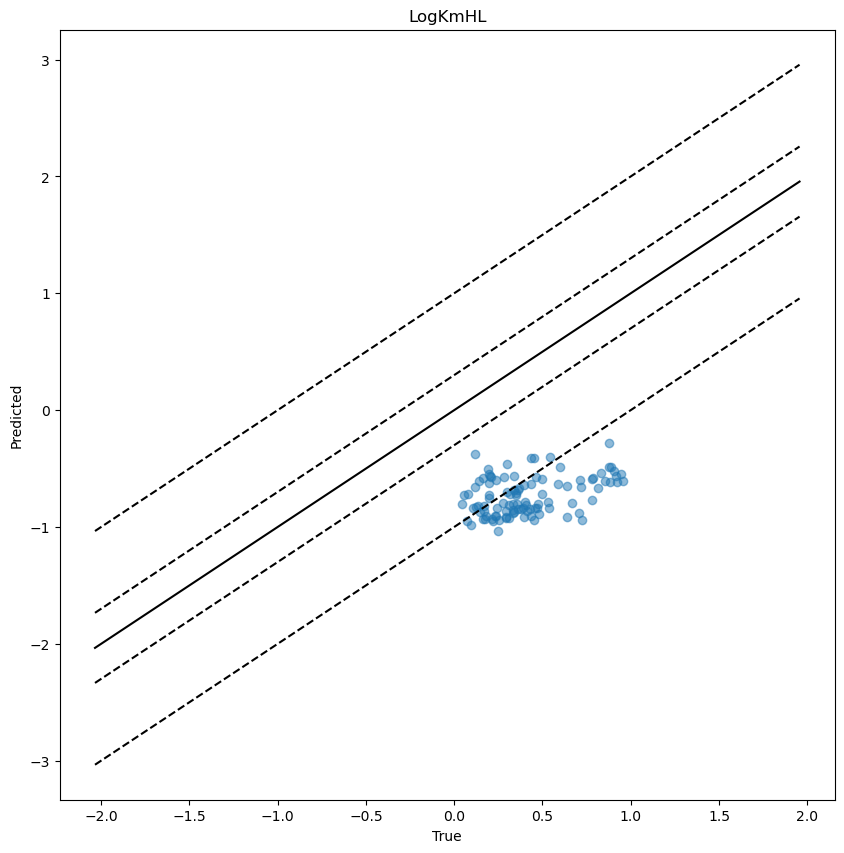

Property: LogKOA
kendall_tau: -0.06950308908302494
rmse_overall: 1.3479232788085938
mae_overall: 1.3150876760482788
within_03_overall: 0.0
within_1_overall: 0.125
R2: -37.50733278451454
Pearson: -0.18158133438219065


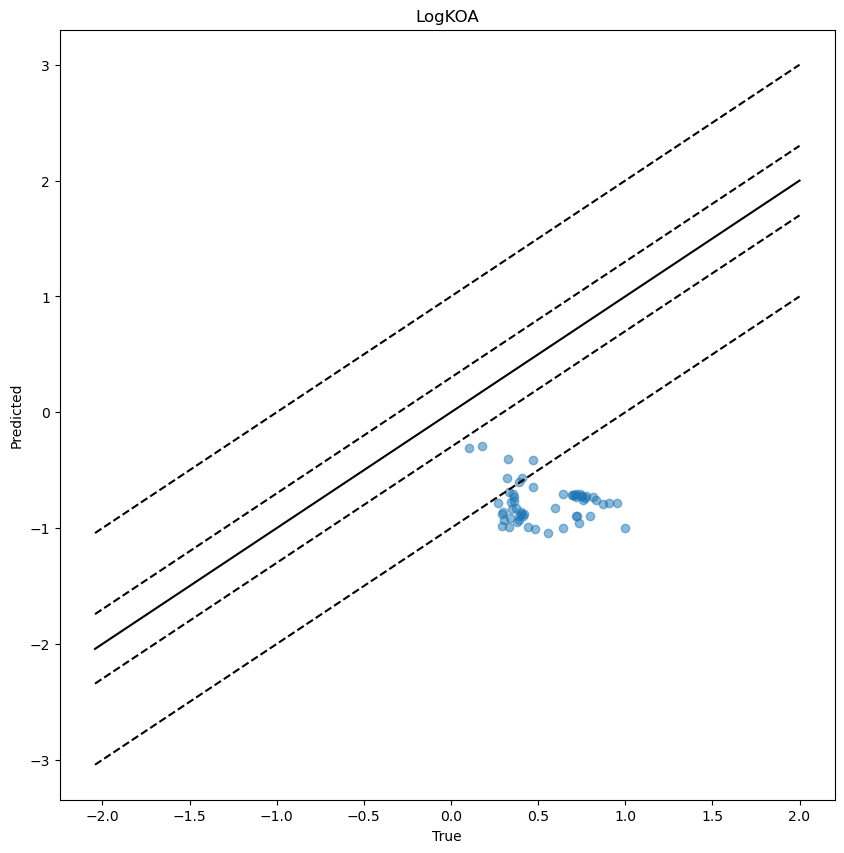

Property: LogKOC
kendall_tau: 0.05697865747100979
rmse_overall: 1.3051449060440063
mae_overall: 1.2818615436553955
within_03_overall: 0.0
within_1_overall: 0.1390728476821192
R2: -43.49767491787752
Pearson: 0.06403644455010758


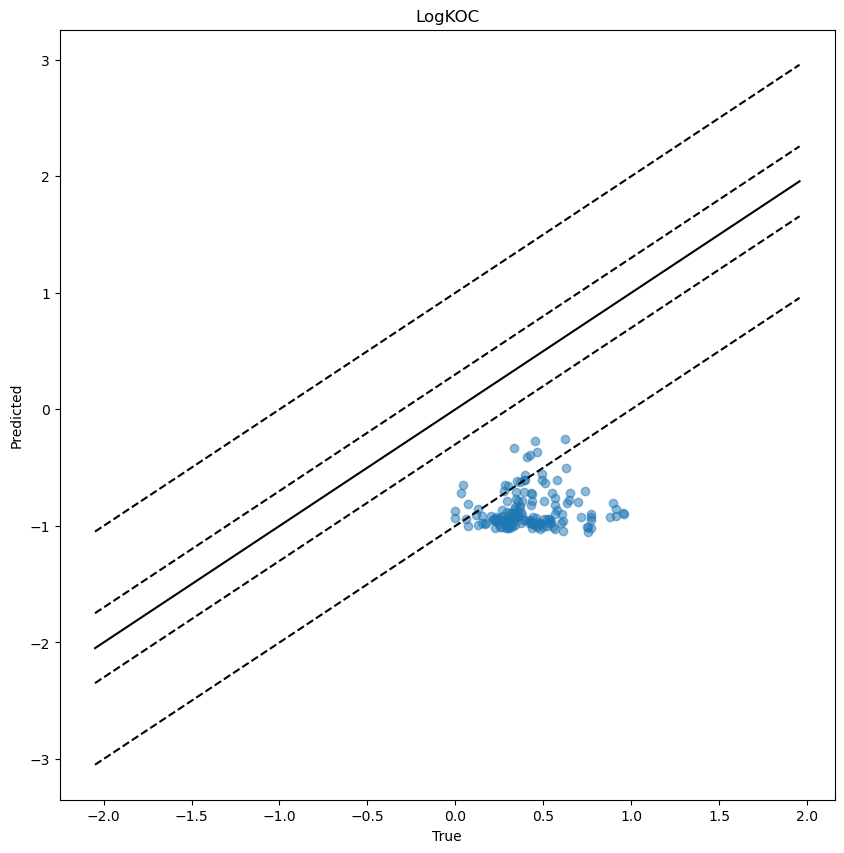

Property: MP
kendall_tau: -0.06827114823644138
rmse_overall: 0.842114269733429
mae_overall: 0.7666983604431152
within_03_overall: 0.09825581395348837
within_1_overall: 0.7209302325581395
R2: -31.82947083532244
Pearson: -0.07621887571136654


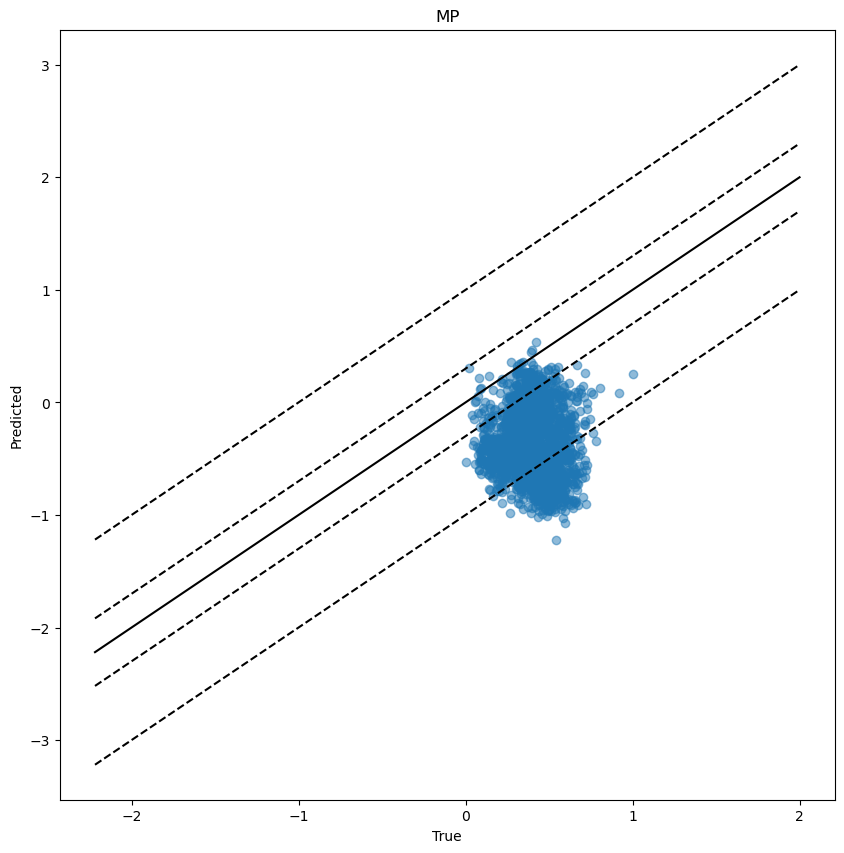

Property: LogMolar
kendall_tau: 0.11840941347285672
rmse_overall: 1.159386396408081
mae_overall: 1.103816032409668
within_03_overall: 0.04549854791868345
within_1_overall: 0.29235237173281703
R2: -59.43541640277176
Pearson: 0.05357439138129863


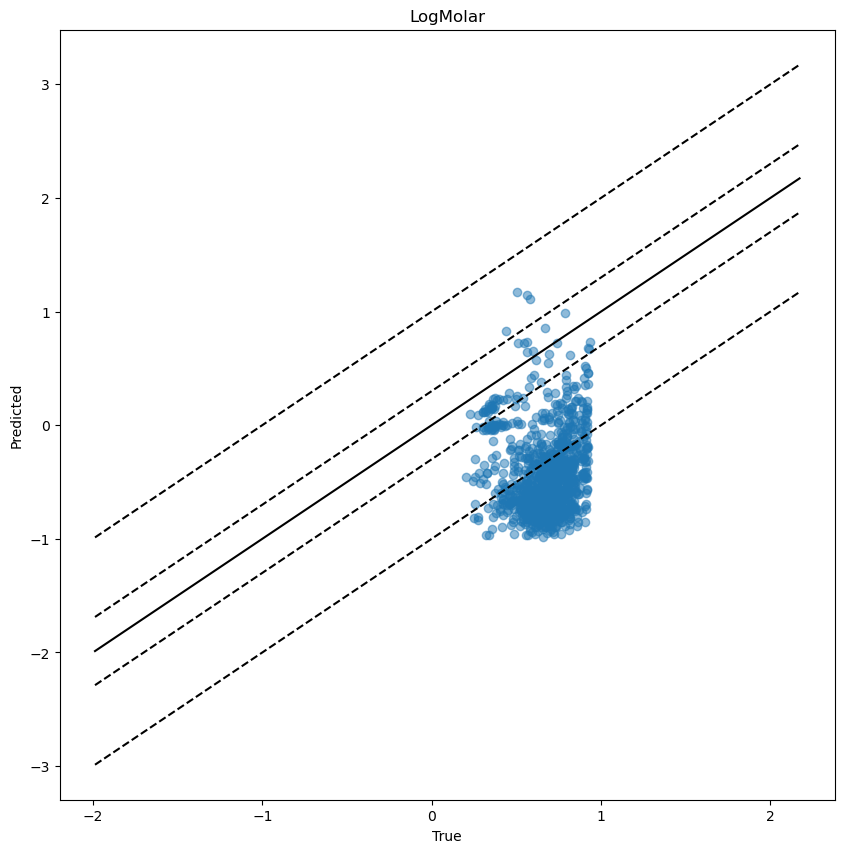

In [6]:
plot_scatters(df_preds, df_targets)